In [1]:
import pandas as pd
import datetime
from datetime import time as dt
import matplotlib.pyplot as plt

In [2]:
import gc
gc.collect()

7

In [3]:
#mydatapath="yellow_tripdata_2018-01.csv"
#this function to read month's data
def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk).dropna())
    result = pd.concat(df_list)
    del df_list
    return result

In [4]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://github.com/CriMenghini/ADM-2018/blob/master/Homework_2/taxi_zone_lookup.csv")
soup = BeautifulSoup(page.content, 'html.parser')
ids=[]
bor=[]
zon=[]
srv_zon=[]
cell=0
for i in range(2,1327,5):    #FIRSTLY We get all the location ids
    a=soup.find_all('td')[i].get_text()  
    ids.append(a)
    cell=cell+1
    
cell=0
for i in range(3,1328,5):    #Then all the boroughs
    a=soup.find_all('td')[i].get_text()
    bor.append(a)
    cell=cell+1
    
cell=0
for i in range(4,1329,5):   #After that we get all zones
    a=soup.find_all('td')[i].get_text()
    zon.append(a)
    cell=cell+1
cell=0
for i in range(5,1330,5):    #Finally we get all the seving zones
    a=soup.find_all('td')[i].get_text()
    srv_zon.append(a)
    cell=cell+1
# after getting all the informations needed we merged all the lists together
data_tuples = list(zip(ids,bor,zon,srv_zon))

In [5]:
boroghFrame=pd.DataFrame(data_tuples,columns = ["PULocationID", "Borogh", "Zone", "srv_zon"])
boroghFrame['PULocationID']=boroghFrame['PULocationID'].apply(int)
boroghFrame=boroghFrame[boroghFrame.Borogh !='Unknown']
boroghFrame=boroghFrame[boroghFrame.Borogh !='EWR']
#this function to merge(join) two dataframes one of them the month's dataframe and second the borogh dataframe
def data_aggregator2(df1,df2,oncolumns,jointype):
    result = pd.merge(df1, boroghFrame, on=oncolumns,how=jointype)
    return result
#data_aggregator(df1,boroghFrame,['PULocationID'],"inner")

In [6]:
data_tuples=None
del data_tuples
ids=None
del ids
bor=None
del bor
zon=None
del zon
srv_zon=None
del srv_zon

In [7]:
gc.collect()

10

In [4]:
JanData="yellow_tripdata_2018-01.csv"
FebData="yellow_tripdata_2018-02.csv"
MarData="yellow_tripdata_2018-03.csv"
AprData="yellow_tripdata_2018-04.csv"
MayData="yellow_tripdata_2018-05.csv"
JunData="yellow_tripdata_2018-06.csv"

RESEARCH QUESTION ONE

We want to know in what period of the year Taxis are used more. We will create a plot for each month showing the average number of trips recorded each day. This analysis will be done for the specific case, considering the boroughs division by considering the data for each borough, and for the general case, not applying any classification on the data we have.
We call some function to be able to create the plots for each borough and then for each month we have a different plot. 

In [9]:
#Here we import the data by calling the data aggregator 
#function, we pass to it the path of the data file 
#and the number of the columns that we want to get from the data
JanDF=data_aggregator(JanData,[1,7],10000)

In [10]:
#JanDF['PULocationID']=JanDF['PULocationID'].apply(int)
#Here we use data aggregator2 function to merge the month data with borough data
JanBoroghData=data_aggregator2(JanDF,boroghFrame,['PULocationID'],"inner")

In [11]:
JanDF=None
del JanDF

In [12]:
JanDaily=pd.DataFrame(columns=['date','Borogh'])
JanDaily['Borogh']=JanBoroghData['Borogh']

In [13]:
JanBoroghData['tpep_pickup_datetime']=pd.to_datetime(JanBoroghData['tpep_pickup_datetime'])

In [14]:
JanDaily['date'] = JanBoroghData['tpep_pickup_datetime'].dt.floor('d')

In [15]:
JanBoroghData=None
del JanBoroghData

In [16]:
JanDaily=JanDaily[JanDaily.date>='2018-01-01']
JanDaily=JanDaily[JanDaily.date<='2018-01-31']

In [17]:
JanDailyCount=JanDaily.groupby(['date','Borogh']).size().unstack()

In [18]:
import seaborn as sns

In [19]:
JanDailyCount=JanDailyCount/31

In [122]:
JanDailyBoroughCount=JanDailyCount['Manhattan']

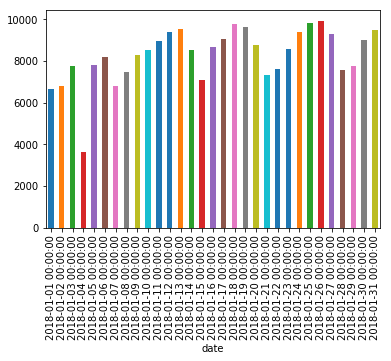

In [123]:
JanDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

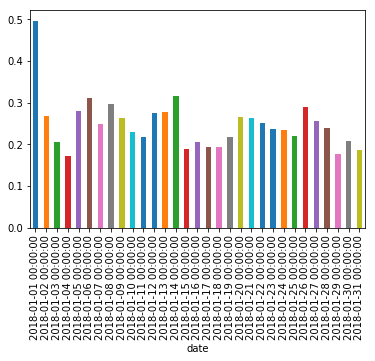

In [113]:
JanDailyBoroughCount=JanDailyCount['Bronx']
JanDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

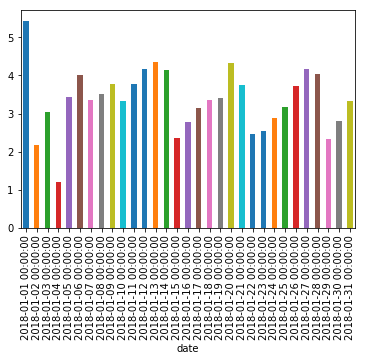

In [114]:
JanDailyBoroughCount=JanDailyCount['Brooklyn']
JanDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

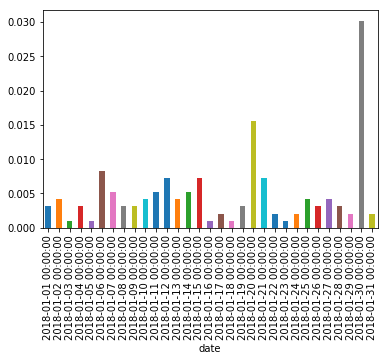

In [115]:
JanDailyBoroughCount=JanDailyCount['Staten Island']
JanDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

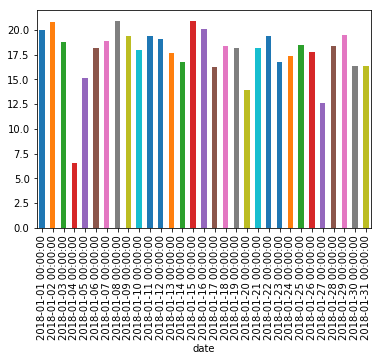

In [116]:
JanDailyBoroughCount=JanDailyCount['Queens']
JanDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

These five plots we obtanied for the borough we consider (Manhattan,Bronx,Brooklyn,Queens,State Island), show that in January for Manhattan and State Island we have the highest daily trip average respectively on 26th and 30th while for Bronx and Brooklyn it is on the 1st. In Queens it is in the middle of January that we have the highest value (15th)
We can say that these values are realistic, because Manhattan is the most density populated borough in NY so considering that from the first on January to the end of January there are a lot of tourists and locals go on holiday, we can easily say that we will have a more concentrated use of taxi at the end of the month when in Manhattan there are locals and tourists.For State Island is the same thing because it is the most suburban borough of New York City so it will follow the Manhattan path. We will see and validate this hypotesis through the next months.
For Bronx and Brooklyn we see that they have the same value because in the analysis play a role just locals. Bronx is part of the United States mainland so locals play a very important role since it is not a very touristic borough. Brooklyn instead, being the most popolous borough of all the five, we can say follows the same path because also in this case locals play a bigger role than tourists. 
Queens is the only borough that seems a bit 'strange' but if we consider the fact that it is the largest borough of all, we can easily come to the conclusion that we have a midmonth concentration because those are just the people coming back from holiday break that supposably began before Chirstmas.
January is a particular month because of the holiday but we will see in further analisys if your hypotesis of behaviour match also for the other months.

In [20]:
FebDF=data_aggregator(FebData,[1,7],10000)

In [21]:
FebBoroghData=data_aggregator2(FebDF,boroghFrame,['PULocationID'],"inner")

In [22]:
FebDF=None
del FebDF

In [23]:
FebDaily=pd.DataFrame(columns=['date','Borogh'])
FebDaily['Borogh']=FebBoroghData['Borogh']

In [24]:
FebBoroghData['tpep_pickup_datetime']=pd.to_datetime(FebBoroghData['tpep_pickup_datetime'])

In [25]:
FebDaily['date'] = FebBoroghData['tpep_pickup_datetime'].dt.floor('d')

In [26]:
FebBoroghData=None
del FebBoroghData

In [27]:
FebDaily=FebDaily[FebDaily.date>='2018-02-01']
FebDaily=FebDaily[FebDaily.date<='2018-02-28']

In [28]:
FebDailyCount=FebDaily.groupby(['date','Borogh']).size().unstack()

In [29]:
FebDailyCount=FebDailyCount/28

In [126]:
FebDailyBoroughCount=FebDailyCount['Manhattan']

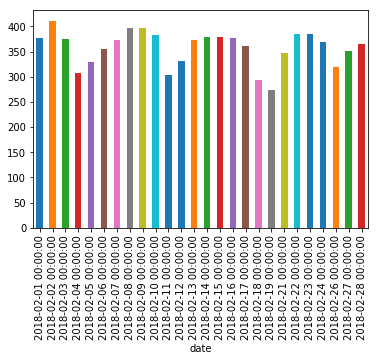

In [127]:
FebDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

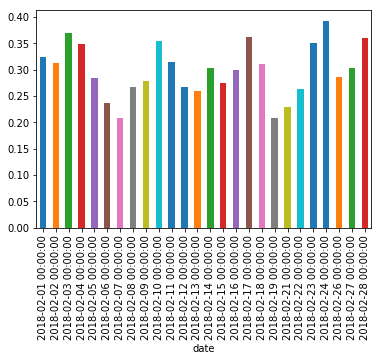

In [128]:
FebDailyBoroughCount=FebDailyCount['Bronx']
FebDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()


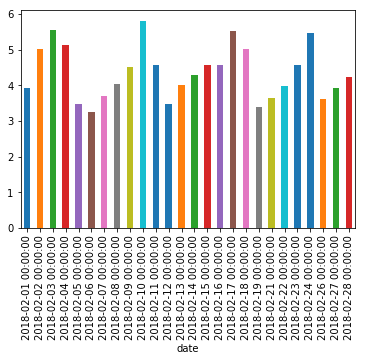

In [129]:
FebDailyBoroughCount=FebDailyCount['Brooklyn']
FebDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

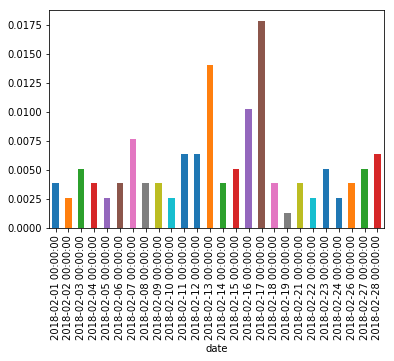

In [130]:
FebDailyBoroughCount=FebDailyCount['Staten Island']
FebDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

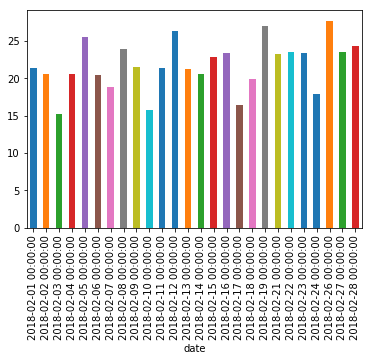

In [131]:
FebDailyBoroughCount=FebDailyCount['Queens']
FebDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

For February the plots show that we have a coherent result for Manhattan, since people are still coming back from holidays because the highest value is reached on the 2nd. Brooklyn in this case follows Manhattan behaviour because during 10th and 11th February in Brooklyn there are lot of events, in 2018 there was the Pop-Up Magazine's 2018 Winter Issue Show.
State Island shows the highest value on the 17th , while Bronx and Queens have respectively 24th and 27th. 

In [30]:
MarDF=data_aggregator(MarData,[1,7],10000)

In [31]:
MarBoroghData=data_aggregator2(MarDF,boroghFrame,['PULocationID'],"inner")

In [32]:
MarDaily=pd.DataFrame(columns=['date','Borogh'])
MarDaily['Borogh']=MarBoroghData['Borogh']


In [33]:
MarBoroghData['tpep_pickup_datetime']=pd.to_datetime(MarBoroghData['tpep_pickup_datetime'])

In [34]:
MarDaily['date'] = MarBoroghData['tpep_pickup_datetime'].dt.floor('d')

In [35]:
MarDaily=MarDaily[MarDaily.date>='2018-03-01']
MarDaily=MarDaily[MarDaily.date<='2018-03-31']

In [36]:
MarDailyCount=MarDaily.groupby(['date','Borogh']).size().unstack()

In [37]:
MarDailyCount=MarDailyCount/31

In [145]:
MarDailyBoroughCount=MarDailyCount['Manhattan']

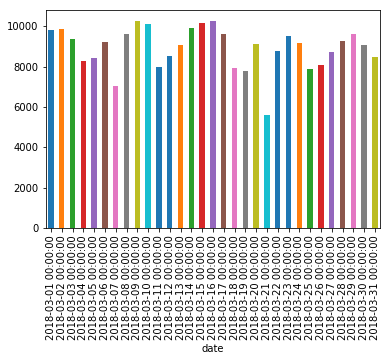

In [146]:
MarDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()


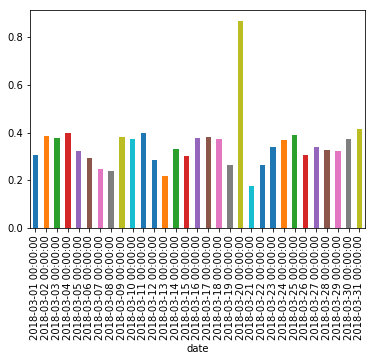

In [136]:
MarDailyBoroughCount=MarDailyCount['Bronx']
MarDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

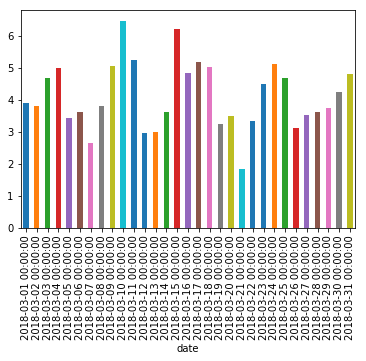

In [137]:
MarDailyBoroughCount=MarDailyCount['Brooklyn']
MarDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()


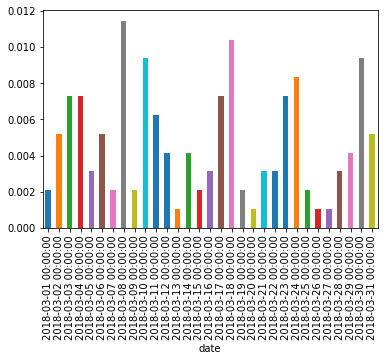

In [138]:
MarDailyBoroughCount=MarDailyCount['Staten Island']
MarDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

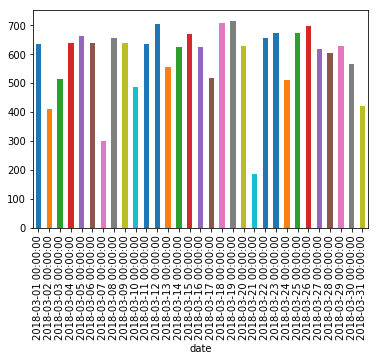

In [147]:
MarDailyBoroughCount=MarDailyCount['Queens']
MarDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

In [38]:
MarDF=None
del MarDF
MarBoroghData=None
del MarBoroghData

In [39]:
gc.collect()

70

In March we notice that the correlation between Brooklyn and State Island holds up , because they reach the highest daily average on the 10th and 8th respectively. So does the correlation between Queens and Bronx, because they have the highest daily average on 19th (Queens) and 20th (Bronx). Manhattan is inbetween those four because it has the highest daily average on the 16th, because that is the day before Saint Patrick's Day, so a lot of people come to New York to celebrate it.

In [40]:
AprDF=data_aggregator(AprData,[1,7],10000)

In [41]:
AprBoroghData=data_aggregator2(AprDF,boroghFrame,['PULocationID'],"inner")

In [42]:
AprDaily=pd.DataFrame(columns=['date','Borogh'])
AprDaily['Borogh']=AprBoroghData['Borogh']

In [43]:
AprBoroghData['tpep_pickup_datetime']=pd.to_datetime(AprBoroghData['tpep_pickup_datetime'])

In [44]:
AprDaily['date'] = AprBoroghData['tpep_pickup_datetime'].dt.floor('d')

In [45]:
AprDaily=AprDaily[AprDaily.date>='2018-04-01']
AprDaily=AprDaily[AprDaily.date<='2018-04-30']

In [46]:
AprDailyCount=AprDaily.groupby(['date','Borogh']).size().unstack()

In [47]:
AprDailyCount=AprDailyCount/30

In [17]:
AprDailyBoroughCount=AprDailyCount['Manhattan']

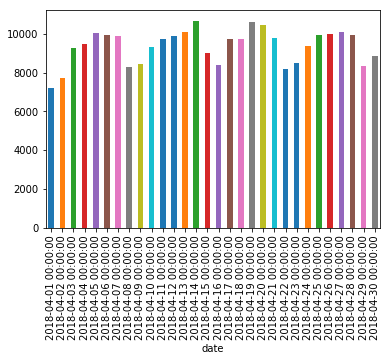

In [18]:
AprDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

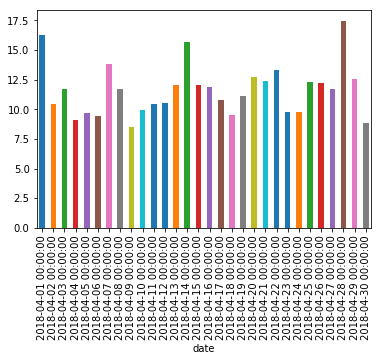

In [19]:
AprDailyBoroughCount=AprDailyCount['Bronx']
AprDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

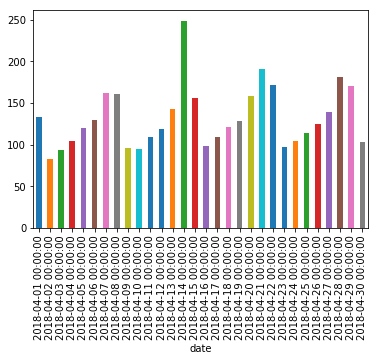

In [20]:
AprDailyBoroughCount=AprDailyCount['Brooklyn']
AprDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

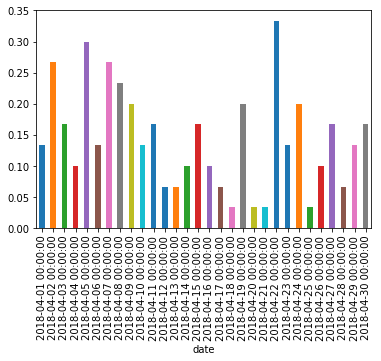

In [21]:
AprDailyBoroughCount=AprDailyCount['Staten Island']
AprDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

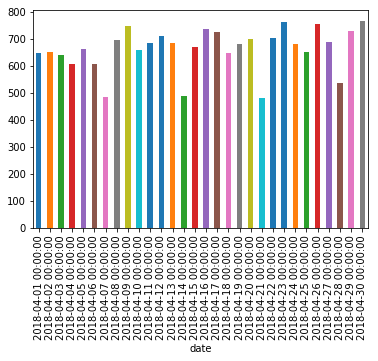

In [22]:
AprDailyBoroughCount=AprDailyCount['Queens']
AprDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

In [48]:
AprDF=None
del AprDF
AprBoroghData=None
del AprBoroghData

Plotting April avarage daily trip we see that there is still the correlation between Queens and Brooklyn, which have respectively 30th and 28th as the dates of highest value. In these case Manhattan and Brooklyn have the same value because on April 15th there was the Earth day with the big parade in Union Square, so on the 14th a lot of people from Brooklyn and Manhattan gathered togheter to celebrate. In this case State Island has a different value, the 22th.

In [49]:
MayDF=data_aggregator(MayData,[1,7],10000)

In [50]:
MayBoroghData=data_aggregator2(MayDF,boroghFrame,['PULocationID'],"inner")

In [51]:
MayDaily=pd.DataFrame(columns=['date','Borogh'])
MayDaily['Borogh']=MayBoroghData['Borogh']

In [52]:
MayBoroghData['tpep_pickup_datetime']=pd.to_datetime(MayBoroghData['tpep_pickup_datetime'])


In [53]:
MayDaily['date'] = MayBoroghData['tpep_pickup_datetime'].dt.floor('d')

In [54]:
MayDaily=MayDaily[MayDaily.date>='2018-05-01']
MayDaily=MayDaily[MayDaily.date<='2018-05-31']

In [55]:
MayDailyCount=MayDaily.groupby(['date','Borogh']).size().unstack()

In [56]:
MayDailyCount=MayDailyCount/31

In [38]:
MayDailyBoroughCount=MayDailyCount['Manhattan']

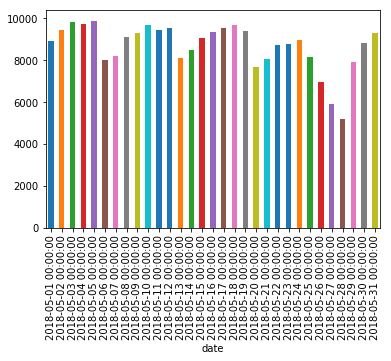

In [39]:
MayDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

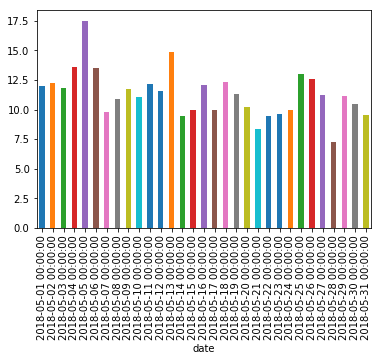

In [40]:
MayDailyBoroughCount=MayDailyCount['Bronx']
MayDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

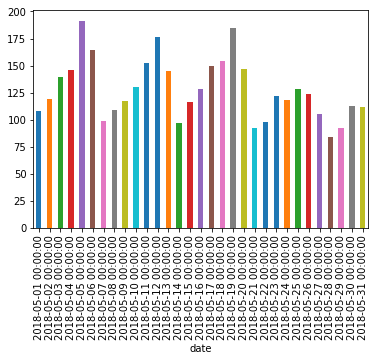

In [41]:
MayDailyBoroughCount=MayDailyCount['Brooklyn']
MayDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()


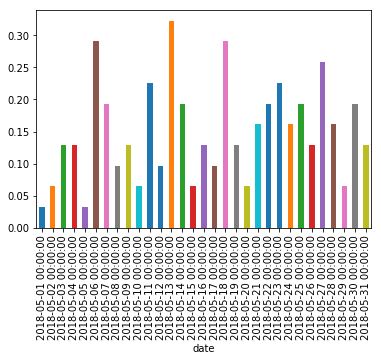

In [42]:
MayDailyBoroughCount=MayDailyCount['Staten Island']
MayDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

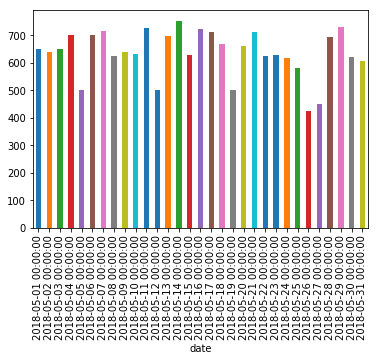

In [43]:
MayDailyBoroughCount=MayDailyCount['Queens']
MayDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

In [57]:
MayDF=None
del MayDF
MayBoroghData=None
del MayBoroghData

Data show us what may seem a strange correlation between the values in Manhattan , Brooklyn and 
Bronx for the 5th of May, but it is not completely strange if we consider that on the th of May in NYC there is the Five 
Boroughs Bike tour, when people cycle through all boroughs , so in the 5th of May people may have used taxi to get there for the tour. State Island and Queens have similar day because one is 13th (mother's day) and the other one is 15th.

In [58]:
gc.collect()

70

In [59]:
JunDF=data_aggregator(JunData,[1,7],10000)

In [60]:
JunBoroghData=data_aggregator2(JunDF,boroghFrame,['PULocationID'],"inner")

In [61]:
JunDaily=pd.DataFrame(columns=['date','Borogh'])
JunDaily['Borogh']=JunBoroghData['Borogh']

In [62]:
JunBoroghData['tpep_pickup_datetime']=pd.to_datetime(JunBoroghData['tpep_pickup_datetime'])


In [63]:
JunDaily['date'] = JunBoroghData['tpep_pickup_datetime'].dt.floor('d')

In [64]:
JunDaily=JunDaily[JunDaily.date>='2018-06-01']
JunDaily=JunDaily[JunDaily.date<='2018-06-30']

In [65]:
JunDailyCount=JunDaily.groupby(['date','Borogh']).size().unstack()

In [66]:
JunDailyCount=JunDailyCount/30

In [55]:
JunDailyBoroughCount=JunDailyCount['Manhattan']

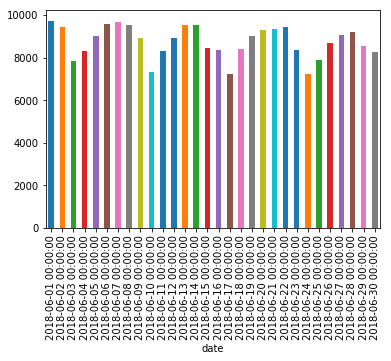

In [56]:
JunDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

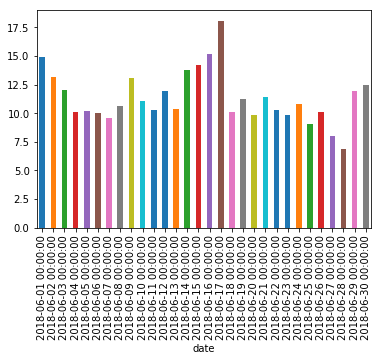

In [57]:
JunDailyBoroughCount=JunDailyCount['Bronx']
JunDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

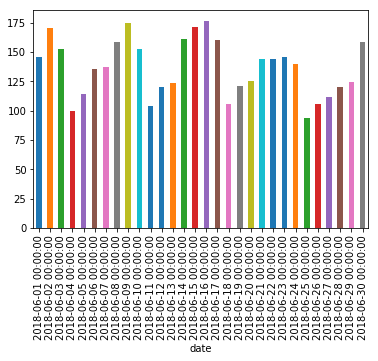

In [58]:
JunDailyBoroughCount=JunDailyCount['Brooklyn']
JunDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()


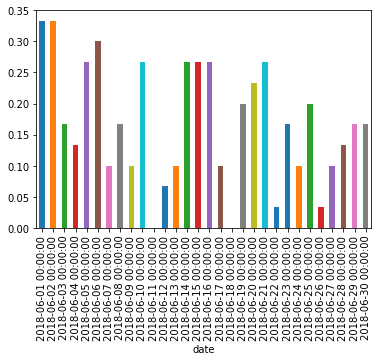

In [59]:
JunDailyBoroughCount=JunDailyCount['Staten Island']
JunDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

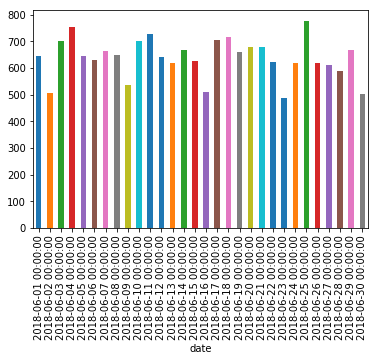

In [60]:
JunDailyBoroughCount=JunDailyCount['Queens']
JunDailyBoroughCount.plot(kind='bar')
plt.show()
plt.close()

In [62]:
JunDF
del JunDF
JunBoroghData=None
del JunBoroghData

Analyzing the data for June we see that something is changing because of the season change. In fact, Manhattan and 
State Island have the same highest daily average(1st), and that is because during summer people start going out in Manhattand and also State Island is popular with the warmer weather. Brooklyn and Bronx have 16th and 17th as values and Queens 25th.

For our borough analysis we can conclude that taxis regarding boroughs are used more in June, since we have a more varied distribution of the days with the highest daily average. 

Research question 1
We are studying now the general case, we will plot the average number of trips recorded each day for every month and we will comment at the end the results we get to see if they are different from the ones obtained in boroughs cases.

In [5]:
JanDF=data_aggregator(JanData,[1,7],10000)

In [6]:
JanDF['tpep_pickup_datetime']= pd.to_datetime(JanDF['tpep_pickup_datetime']).dt.floor('d')

In [7]:
JanDF=JanDF[JanDF.tpep_pickup_datetime>='2018-01-01']
JanDF=JanDF[JanDF.tpep_pickup_datetime<='2018-01-31']

In [8]:
JanDaily=JanDF.groupby(['tpep_pickup_datetime']).count()

In [9]:
JanDaily=JanDaily/31

In [10]:
JanDF=None
del JanDF

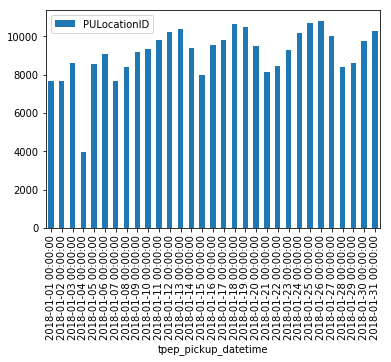

In [17]:
JanDaily.plot(kind='bar')
plt.show()
plt.close()

In [11]:
FebDF=data_aggregator(FebData,[1,7],10000)

In [12]:
FebDF['tpep_pickup_datetime']= pd.to_datetime(FebDF['tpep_pickup_datetime']).dt.floor('d')

In [13]:
FebDF=FebDF[FebDF.tpep_pickup_datetime>='2018-02-01']
FebDF=FebDF[FebDF.tpep_pickup_datetime<='2018-02-28']

In [14]:
FebDaily=FebDF.groupby(['tpep_pickup_datetime']).count()

In [15]:
FebDaily=FebDaily/28

In [16]:
FebDF=None
del FebDF

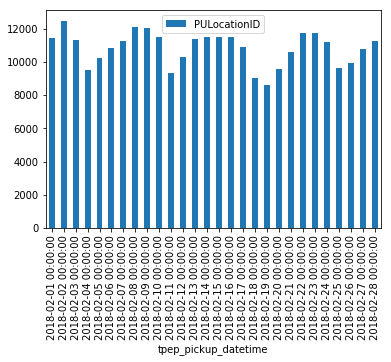

In [18]:
FebDaily.plot(kind='bar')
plt.show()
plt.close()

In [19]:
MarDF=data_aggregator(MarData,[1,7],10000)

In [20]:
MarDF['tpep_pickup_datetime']= pd.to_datetime(MarDF['tpep_pickup_datetime']).dt.floor('d')

In [21]:
MarDF=MarDF[MarDF.tpep_pickup_datetime>='2018-03-01']
MarDF=MarDF[MarDF.tpep_pickup_datetime<='2018-03-31']


In [22]:
MarDaily=MarDF.groupby(['tpep_pickup_datetime']).count()

In [23]:
MarDaily=MarDaily/31

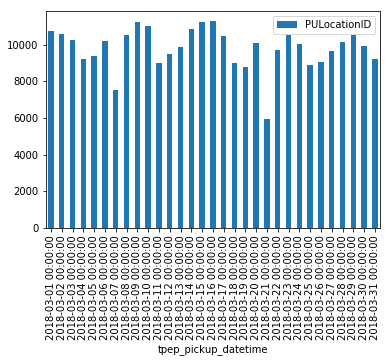

In [24]:
MarDaily.plot(kind='bar')
plt.show()
plt.close()

In [25]:
MarDF=None
del MarDF

In [26]:
AprDF=data_aggregator(AprData,[1,7],10000)

In [27]:
AprDF['tpep_pickup_datetime']= pd.to_datetime(AprDF['tpep_pickup_datetime']).dt.floor('d')

In [28]:
AprDF=AprDF[AprDF.tpep_pickup_datetime>='2018-04-01']
AprDF=AprDF[AprDF.tpep_pickup_datetime<='2018-04-30']

In [29]:
AprDaily=AprDF.groupby(['tpep_pickup_datetime']).count()

In [30]:
AprDaily=AprDaily/30

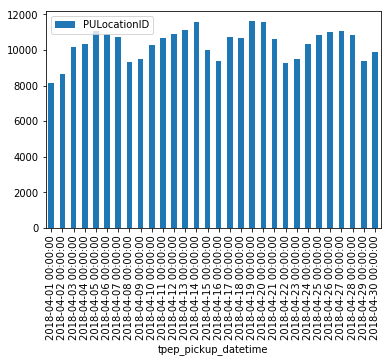

In [31]:
AprDaily.plot(kind='bar')
plt.show()
plt.close()

In [32]:
AprDF=None
del AprDF

In [33]:
MayDF=data_aggregator(MayData,[1,7],10000)

In [34]:
MayDF['tpep_pickup_datetime']= pd.to_datetime(MayDF['tpep_pickup_datetime']).dt.floor('d')

In [35]:
MayDF=MayDF[MayDF.tpep_pickup_datetime>='2018-05-01']
MayDF=MayDF[MayDF.tpep_pickup_datetime<='2018-05-31']

In [36]:
MayDaily=MayDF.groupby(['tpep_pickup_datetime']).count()

In [37]:
MayDaily=MayDaily/31

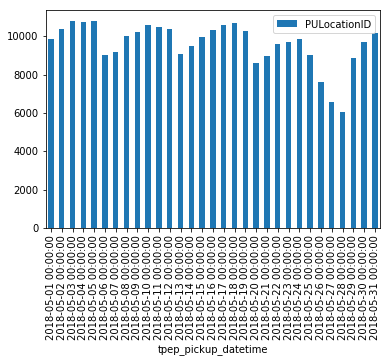

In [38]:
MayDaily.plot(kind='bar')
plt.show()
plt.close()

In [39]:
MayDF=None
del MayDF

In [40]:
JunDF=data_aggregator(JunData,[1,7],10000)

In [41]:
JunDF['tpep_pickup_datetime']= pd.to_datetime(JunDF['tpep_pickup_datetime']).dt.floor('d')

In [42]:
JunDF=JunDF[JunDF.tpep_pickup_datetime>='2018-06-01']
JunDF=JunDF[JunDF.tpep_pickup_datetime<='2018-06-30']

In [43]:
JunDaily=JunDF.groupby(['tpep_pickup_datetime']).count()

In [44]:
JunDaily=JunDaily/30

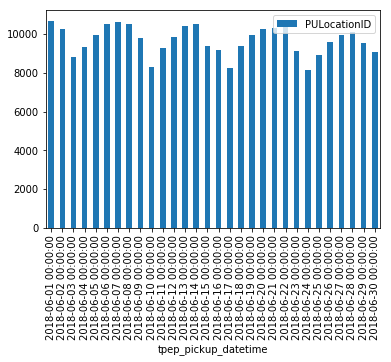

In [45]:
JunDaily.plot(kind='bar')
plt.show()
plt.close()

In [46]:
JunDF=None
del JunDF

In [47]:
FullDaily=pd.concat([JanDaily,FebDaily,MarDaily,AprDaily,MayDaily,JunDaily])

In [48]:
FullDailyCount=FullDaily.groupby(['tpep_pickup_datetime']).sum()

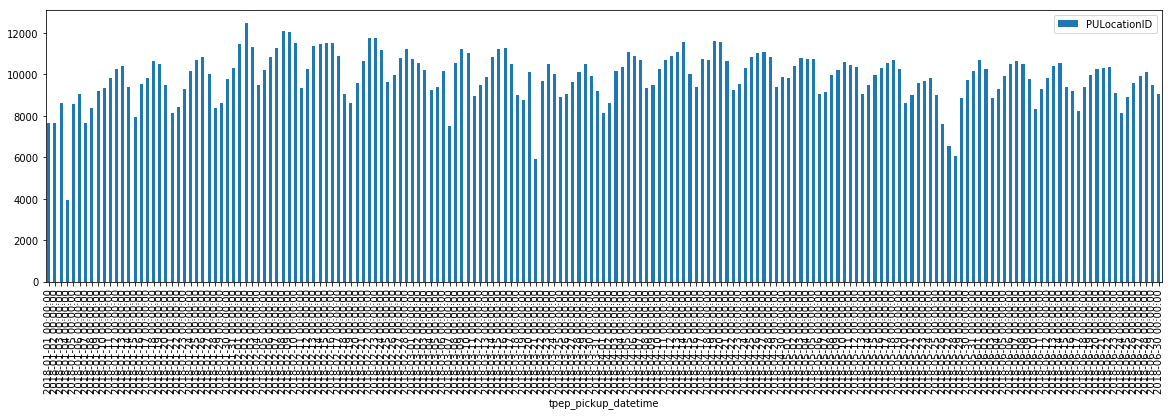

In [59]:
fig, ax = plt.subplots(figsize=(20, 5))
FullDailyCount.plot(kind='bar',ax=ax)
plt.show()
plt.close()

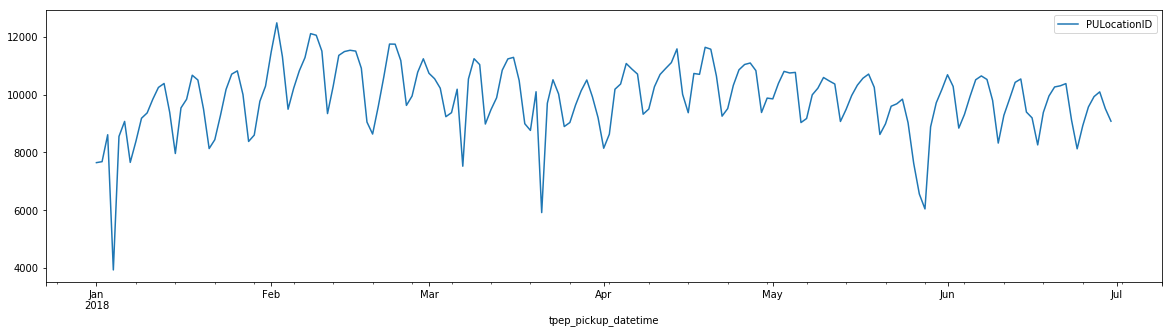

In [58]:
fig, ax = plt.subplots(figsize=(20,5))
FullDailyCount.plot(kind='line',ax=ax)
plt.show()
plt.close()

From this last plot, we can easily confirm what we found out in the borough case. The month were taxi service is more used is June, because we can notice a costant distribution of the values, but if we have to tell what period of the year taxis are used more, considering on our sample space the data from January to June, we can say that taxis ar more used between end of January and the mid of March , then from the beginning of April until the end of June